# CONVOLUTIONAL NEURAL NETWORK NB (CNN-First on DL)  

## libraries and env configuration 


In [1]:
#packages from tensor flow
import tensorflow as Tf

# tensor flow for optimizing the model 


# basis packages 
import os as os 
import matplotlib.pyplot as plt
import numpy as np
import scipy 
import ssl

In [2]:
physicalDevice = Tf.config.experimental.list_physical_devices('GPU')
Tf.config.experimental.set_memory_growth(physicalDevice[0], True)
print("Num GPUs Available and used :  ", len(physicalDevice))


Num GPUs Available and used :   1


In [3]:
os.environ["TF_CPP_MIN_LOG_LEVEL"] = '2' # Suppress TensorFlow logging (1)	

## data preprocessing 

In [4]:
# Load MNIST dataset
(xTrainMnist,yTrainMnist),(xTestMnist,yTestMnist)=Tf.keras.datasets.mnist.load_data()

### normalization 

In [5]:
xTrainMnist.max()

255

In [6]:
xTestMnist.max()


255

In [7]:
xTestMnist = xTestMnist.astype('float32') / 255 

#### changing normalization for data train: 

In [8]:
# we normalize tghe data lessing the mean and the standar deviation to xtrain data in order to have a better performance on the training process 

MnistMean = xTrainMnist.mean()
MnistStd = xTrainMnist.std()

# normalize the data dividing by the sd assecuring the none zero value of the sd

xTrainMnist = (xTrainMnist-MnistMean)/(MnistStd+1e-7)

# also normalize the test data using mean and std from training data cause the idea is that the network doesnt know these parameters of the test set

xTestMnist = (xTestMnist - MnistMean)/(MnistStd+1e-7)

""" also could use : 
mean = np.mean(xTrainMnist)
print(mean)
"""

' also could use : \nmean = np.mean(xTrainMnist)\nprint(mean)\n'

### split train data

In [9]:
xTrainMnist, xValidMnist = xTrainMnist[5000:],xTrainMnist[:5000]
yTrainMnist, yValidMnist = yTrainMnist[5000:],yTrainMnist[:5000]

look dimension size

In [10]:
xTrainMnist.shape, yTrainMnist.shape, xValidMnist.shape, yValidMnist.shape , xTestMnist.shape, yTestMnist.shape

((55000, 28, 28), (55000,), (5000, 28, 28), (5000,), (10000, 28, 28), (10000,))

### data argumentation for best performance

In [11]:
datagen = Tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=10,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    horizontal_flip = True,
    vertical_flip = True
    )

### see number of classes/labels in order to binarize 

In [12]:
len(np.unique(yTrainMnist)) # 10 classes

10

####  binarizing the labels in order to use only categorical cross entropy without sparse 


In [13]:
yTrainMnist = Tf.keras.utils.to_categorical(yTrainMnist,num_classes=10)
yTestMnist = Tf.keras.utils.to_categorical(yTestMnist, num_classes= 10)
yValidMnist = Tf.keras.utils.to_categorical(yValidMnist, num_classes=10)


In [14]:
yTrainMnist[0] # one hot encoding of the labels

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [15]:
print(yTrainMnist[0:10]) # display the first 10 labels of the training set
print(yTestMnist[0:10]) # display the first 10 labels of the test set

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [16]:
xTrainMnist.shape, yTrainMnist.shape, xTestMnist.shape, yTestMnist.shape

((55000, 28, 28), (55000, 10), (10000, 28, 28), (10000, 10))

## creating another structure for the sequential model 

proceed to use a kernel recognition filter on every layer, besides of another techniques to avoid overfitting: 

- dropout
- batch normalization 
- flatten 
- global average pooling
- regularizacion l1 o l2
- estructura de hyperparámetros
- funciones de activacion 
- (PRUNNING & SPARSITY ¿?) 
    * Función: Eliminan conexiones o neuronas innecesarias en la red, reduciendo la complejidad del modelo y mejorando la eficiencia computacional.​

    * Implementación: Se aplican después del entrenamiento inicial para identificar y eliminar pesos insignificantes.

In [17]:
KernelBase = 32 
WeightRegularizer = 1e-4 

In [18]:
MnistModel = Tf.keras.models.Sequential() 

making layer by layer 
First one is a convolutional sequence of layers : 


In [19]:
MnistModel.add(Tf.keras.layers.Conv2D(KernelBase, (3,3), padding = 'same', input_shape=(28,28,1), kernel_regularizer = Tf.keras.regularizers.l2(WeightRegularizer)))

once we add the first convolutional layer with 32 filters of size 3x3 and a regularization term to avoid overfitting
proceed adding the activation function ReLU to the output of the convolutional layer

In [20]:
MnistModel.add(Tf.keras.layers.Activation('relu'))


 finally goes with the batch normalization to normalize the output of the previous layer


In [21]:
MnistModel.add(Tf.keras.layers.BatchNormalization())

also implement a maxpooling 2d layer and dropout on this another layer : 


In [22]:
MnistModel.add(Tf.keras.layers.Conv2D(KernelBase, (3, 3), padding='same', activation='relu', kernel_regularizer=Tf.keras.regularizers.l2(WeightRegularizer), input_shape=(28, 28, 1)))
MnistModel.add(Tf.keras.layers.LeakyReLU(alpha=0.1)) # we use a different activation function to see if it improves the performance of the model
MnistModel.add(Tf.keras.layers.BatchNormalization())
MnistModel.add(Tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same')) 
MnistModel.add(Tf.keras.layers.Dropout(0.25)) # we add a dropout layer to reduce overfitting 

now, we nee to do the last classification layer with a dense and a flatten function 

In [23]:
# Add a Flatten layer to convert the 2D images to 1D vectors  (transform the img to an array)
MnistModel.add(Tf.keras.layers.Flatten()) # without the input size 

finally,  10 classes for the output layer with a softmax activation

In [24]:
MnistModel.add(Tf.keras.layers.Dense(10,activation= 'softmax'))  

lets see a summary of the structure: 

In [25]:
MnistModel.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 activation (Activation)     (None, 28, 28, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 28, 28, 32)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                        

proceed compiling the model 


In [26]:
MnistModel.compile(optimizer=Tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy']) # we use adam optimizer with a learning rate of 0.001 and categorical cross entropy as loss function
# use addam optimizer with a learning rate of 0.001 and categorical cross entropy as loss function

also we can do a callback checkpoint when were we are fitting the model 

In [27]:
CBCheckPoint = Tf.keras.callbacks.ModelCheckpoint("best_model,keras", verbose = 1, save_best_only = True, monitor = "val_accuracy")

### proceding training the model 

In [28]:

# Asegúrate de que los datos tengan 4 dimensiones
xTrainMnist = np.expand_dims(xTrainMnist, axis=-1)  # Agrega la dimensión del canal
xValidMnist = np.expand_dims(xValidMnist, axis=-1)  # Agrega la dimensión del canal

In [29]:
MnistHistory = MnistModel.fit(
    datagen.flow(xTrainMnist, yTrainMnist, batch_size=128), 
    epochs=1000, 
    validation_data=(xValidMnist, yValidMnist), 
    callbacks=[CBCheckPoint], 
    verbose=2, 
    steps_per_epoch=xTrainMnist.shape[0] // 128
)

Epoch 1/1000

Epoch 1: val_accuracy improved from -inf to 0.66840, saving model to best_model,keras


INFO:tensorflow:Assets written to: best_model,keras\assets


INFO:tensorflow:Assets written to: best_model,keras\assets


429/429 - 72s - loss: 1.2227 - accuracy: 0.6190 - val_loss: 0.9820 - val_accuracy: 0.6684 - 72s/epoch - 167ms/step
Epoch 2/1000

Epoch 2: val_accuracy improved from 0.66840 to 0.80460, saving model to best_model,keras


INFO:tensorflow:Assets written to: best_model,keras\assets


INFO:tensorflow:Assets written to: best_model,keras\assets


429/429 - 18s - loss: 0.7864 - accuracy: 0.7418 - val_loss: 0.6447 - val_accuracy: 0.8046 - 18s/epoch - 43ms/step
Epoch 3/1000

Epoch 3: val_accuracy improved from 0.80460 to 0.83920, saving model to best_model,keras


INFO:tensorflow:Assets written to: best_model,keras\assets


INFO:tensorflow:Assets written to: best_model,keras\assets


429/429 - 18s - loss: 0.6536 - accuracy: 0.7818 - val_loss: 0.5268 - val_accuracy: 0.8392 - 18s/epoch - 43ms/step
Epoch 4/1000

Epoch 4: val_accuracy improved from 0.83920 to 0.83960, saving model to best_model,keras


INFO:tensorflow:Assets written to: best_model,keras\assets


INFO:tensorflow:Assets written to: best_model,keras\assets


429/429 - 20s - loss: 0.5638 - accuracy: 0.8136 - val_loss: 0.5055 - val_accuracy: 0.8396 - 20s/epoch - 47ms/step
Epoch 5/1000

Epoch 5: val_accuracy improved from 0.83960 to 0.87880, saving model to best_model,keras


INFO:tensorflow:Assets written to: best_model,keras\assets


INFO:tensorflow:Assets written to: best_model,keras\assets


429/429 - 25s - loss: 0.5122 - accuracy: 0.8297 - val_loss: 0.3733 - val_accuracy: 0.8788 - 25s/epoch - 59ms/step
Epoch 6/1000

Epoch 6: val_accuracy did not improve from 0.87880
429/429 - 20s - loss: 0.4784 - accuracy: 0.8416 - val_loss: 0.3632 - val_accuracy: 0.8764 - 20s/epoch - 48ms/step
Epoch 7/1000

Epoch 7: val_accuracy did not improve from 0.87880
429/429 - 19s - loss: 0.4568 - accuracy: 0.8480 - val_loss: 0.4126 - val_accuracy: 0.8702 - 19s/epoch - 45ms/step
Epoch 8/1000

Epoch 8: val_accuracy did not improve from 0.87880
429/429 - 21s - loss: 0.4319 - accuracy: 0.8570 - val_loss: 0.3899 - val_accuracy: 0.8728 - 21s/epoch - 49ms/step
Epoch 9/1000

Epoch 9: val_accuracy improved from 0.87880 to 0.90080, saving model to best_model,keras


INFO:tensorflow:Assets written to: best_model,keras\assets


INFO:tensorflow:Assets written to: best_model,keras\assets


429/429 - 34s - loss: 0.4208 - accuracy: 0.8608 - val_loss: 0.3139 - val_accuracy: 0.9008 - 34s/epoch - 79ms/step
Epoch 10/1000

Epoch 10: val_accuracy improved from 0.90080 to 0.92040, saving model to best_model,keras


INFO:tensorflow:Assets written to: best_model,keras\assets


INFO:tensorflow:Assets written to: best_model,keras\assets


429/429 - 36s - loss: 0.4129 - accuracy: 0.8638 - val_loss: 0.2528 - val_accuracy: 0.9204 - 36s/epoch - 85ms/step
Epoch 11/1000

Epoch 11: val_accuracy did not improve from 0.92040
429/429 - 21s - loss: 0.3986 - accuracy: 0.8698 - val_loss: 0.5123 - val_accuracy: 0.8360 - 21s/epoch - 49ms/step
Epoch 12/1000

Epoch 12: val_accuracy did not improve from 0.92040
429/429 - 51s - loss: 0.3987 - accuracy: 0.8692 - val_loss: 0.3744 - val_accuracy: 0.8688 - 51s/epoch - 120ms/step
Epoch 13/1000

Epoch 13: val_accuracy did not improve from 0.92040
429/429 - 40s - loss: 0.3888 - accuracy: 0.8734 - val_loss: 0.3060 - val_accuracy: 0.9012 - 40s/epoch - 92ms/step
Epoch 14/1000

Epoch 14: val_accuracy did not improve from 0.92040
429/429 - 28s - loss: 0.3829 - accuracy: 0.8736 - val_loss: 0.2919 - val_accuracy: 0.9056 - 28s/epoch - 65ms/step
Epoch 15/1000

Epoch 15: val_accuracy did not improve from 0.92040
429/429 - 22s - loss: 0.3730 - accuracy: 0.8778 - val_loss: 0.3104 - val_accuracy: 0.9030 - 22

INFO:tensorflow:Assets written to: best_model,keras\assets


INFO:tensorflow:Assets written to: best_model,keras\assets


429/429 - 24s - loss: 0.3672 - accuracy: 0.8808 - val_loss: 0.2521 - val_accuracy: 0.9234 - 24s/epoch - 57ms/step
Epoch 18/1000

Epoch 18: val_accuracy did not improve from 0.92340
429/429 - 22s - loss: 0.3627 - accuracy: 0.8826 - val_loss: 0.2737 - val_accuracy: 0.9138 - 22s/epoch - 52ms/step
Epoch 19/1000

Epoch 19: val_accuracy did not improve from 0.92340
429/429 - 22s - loss: 0.3602 - accuracy: 0.8813 - val_loss: 0.3797 - val_accuracy: 0.8714 - 22s/epoch - 52ms/step
Epoch 20/1000

Epoch 20: val_accuracy did not improve from 0.92340
429/429 - 22s - loss: 0.3570 - accuracy: 0.8847 - val_loss: 0.2715 - val_accuracy: 0.9062 - 22s/epoch - 50ms/step
Epoch 21/1000

Epoch 21: val_accuracy did not improve from 0.92340
429/429 - 23s - loss: 0.3545 - accuracy: 0.8844 - val_loss: 0.2576 - val_accuracy: 0.9172 - 23s/epoch - 53ms/step
Epoch 22/1000

Epoch 22: val_accuracy did not improve from 0.92340
429/429 - 24s - loss: 0.3495 - accuracy: 0.8864 - val_loss: 0.2842 - val_accuracy: 0.9156 - 24s

INFO:tensorflow:Assets written to: best_model,keras\assets


INFO:tensorflow:Assets written to: best_model,keras\assets


429/429 - 26s - loss: 0.3423 - accuracy: 0.8894 - val_loss: 0.2415 - val_accuracy: 0.9256 - 26s/epoch - 59ms/step
Epoch 24/1000

Epoch 24: val_accuracy did not improve from 0.92560
429/429 - 24s - loss: 0.3440 - accuracy: 0.8882 - val_loss: 0.2945 - val_accuracy: 0.9026 - 24s/epoch - 56ms/step
Epoch 25/1000

Epoch 25: val_accuracy did not improve from 0.92560
429/429 - 24s - loss: 0.3376 - accuracy: 0.8899 - val_loss: 0.2461 - val_accuracy: 0.9252 - 24s/epoch - 57ms/step
Epoch 26/1000

Epoch 26: val_accuracy did not improve from 0.92560
429/429 - 29s - loss: 0.3378 - accuracy: 0.8889 - val_loss: 0.2587 - val_accuracy: 0.9150 - 29s/epoch - 67ms/step
Epoch 27/1000

Epoch 27: val_accuracy did not improve from 0.92560
429/429 - 24s - loss: 0.3375 - accuracy: 0.8912 - val_loss: 0.2538 - val_accuracy: 0.9168 - 24s/epoch - 57ms/step
Epoch 28/1000

Epoch 28: val_accuracy did not improve from 0.92560
429/429 - 22s - loss: 0.3398 - accuracy: 0.8904 - val_loss: 0.2407 - val_accuracy: 0.9206 - 22s

INFO:tensorflow:Assets written to: best_model,keras\assets


INFO:tensorflow:Assets written to: best_model,keras\assets


429/429 - 23s - loss: 0.3218 - accuracy: 0.8959 - val_loss: 0.2107 - val_accuracy: 0.9368 - 23s/epoch - 53ms/step
Epoch 35/1000

Epoch 35: val_accuracy did not improve from 0.93680
429/429 - 23s - loss: 0.3226 - accuracy: 0.8961 - val_loss: 0.2723 - val_accuracy: 0.9078 - 23s/epoch - 53ms/step
Epoch 36/1000

Epoch 36: val_accuracy did not improve from 0.93680
429/429 - 21s - loss: 0.3285 - accuracy: 0.8922 - val_loss: 0.2594 - val_accuracy: 0.9182 - 21s/epoch - 49ms/step
Epoch 37/1000

Epoch 37: val_accuracy did not improve from 0.93680
429/429 - 20s - loss: 0.3217 - accuracy: 0.8967 - val_loss: 0.2354 - val_accuracy: 0.9254 - 20s/epoch - 46ms/step
Epoch 38/1000

Epoch 38: val_accuracy did not improve from 0.93680
429/429 - 20s - loss: 0.3217 - accuracy: 0.8954 - val_loss: 0.2521 - val_accuracy: 0.9184 - 20s/epoch - 46ms/step
Epoch 39/1000

Epoch 39: val_accuracy did not improve from 0.93680
429/429 - 20s - loss: 0.3179 - accuracy: 0.8990 - val_loss: 0.2442 - val_accuracy: 0.9218 - 20s

INFO:tensorflow:Assets written to: best_model,keras\assets


INFO:tensorflow:Assets written to: best_model,keras\assets


429/429 - 22s - loss: 0.3064 - accuracy: 0.9023 - val_loss: 0.2058 - val_accuracy: 0.9372 - 22s/epoch - 50ms/step
Epoch 59/1000

Epoch 59: val_accuracy did not improve from 0.93720
429/429 - 19s - loss: 0.3044 - accuracy: 0.9031 - val_loss: 0.2247 - val_accuracy: 0.9290 - 19s/epoch - 43ms/step
Epoch 60/1000

Epoch 60: val_accuracy did not improve from 0.93720
429/429 - 19s - loss: 0.2986 - accuracy: 0.9050 - val_loss: 0.2201 - val_accuracy: 0.9352 - 19s/epoch - 44ms/step
Epoch 61/1000

Epoch 61: val_accuracy improved from 0.93720 to 0.93880, saving model to best_model,keras


INFO:tensorflow:Assets written to: best_model,keras\assets


INFO:tensorflow:Assets written to: best_model,keras\assets


429/429 - 20s - loss: 0.2999 - accuracy: 0.9044 - val_loss: 0.2004 - val_accuracy: 0.9388 - 20s/epoch - 46ms/step
Epoch 62/1000

Epoch 62: val_accuracy did not improve from 0.93880
429/429 - 22s - loss: 0.3009 - accuracy: 0.9046 - val_loss: 0.2252 - val_accuracy: 0.9312 - 22s/epoch - 52ms/step
Epoch 63/1000

Epoch 63: val_accuracy did not improve from 0.93880
429/429 - 21s - loss: 0.3006 - accuracy: 0.9032 - val_loss: 0.2263 - val_accuracy: 0.9290 - 21s/epoch - 48ms/step
Epoch 64/1000

Epoch 64: val_accuracy did not improve from 0.93880
429/429 - 20s - loss: 0.2982 - accuracy: 0.9065 - val_loss: 0.2289 - val_accuracy: 0.9290 - 20s/epoch - 47ms/step
Epoch 65/1000

Epoch 65: val_accuracy did not improve from 0.93880
429/429 - 21s - loss: 0.2999 - accuracy: 0.9051 - val_loss: 0.2495 - val_accuracy: 0.9256 - 21s/epoch - 48ms/step
Epoch 66/1000

Epoch 66: val_accuracy did not improve from 0.93880
429/429 - 21s - loss: 0.2975 - accuracy: 0.9053 - val_loss: 0.2221 - val_accuracy: 0.9334 - 21s

INFO:tensorflow:Assets written to: best_model,keras\assets


INFO:tensorflow:Assets written to: best_model,keras\assets


429/429 - 21s - loss: 0.2914 - accuracy: 0.9080 - val_loss: 0.2059 - val_accuracy: 0.9414 - 21s/epoch - 49ms/step
Epoch 78/1000

Epoch 78: val_accuracy did not improve from 0.94140
429/429 - 19s - loss: 0.2930 - accuracy: 0.9069 - val_loss: 0.2327 - val_accuracy: 0.9314 - 19s/epoch - 45ms/step
Epoch 79/1000

Epoch 79: val_accuracy did not improve from 0.94140
429/429 - 20s - loss: 0.2913 - accuracy: 0.9085 - val_loss: 0.2064 - val_accuracy: 0.9406 - 20s/epoch - 47ms/step
Epoch 80/1000

Epoch 80: val_accuracy did not improve from 0.94140
429/429 - 19s - loss: 0.2949 - accuracy: 0.9074 - val_loss: 0.2176 - val_accuracy: 0.9298 - 19s/epoch - 45ms/step
Epoch 81/1000

Epoch 81: val_accuracy did not improve from 0.94140
429/429 - 19s - loss: 0.2863 - accuracy: 0.9084 - val_loss: 0.2324 - val_accuracy: 0.9314 - 19s/epoch - 45ms/step
Epoch 82/1000

Epoch 82: val_accuracy did not improve from 0.94140
429/429 - 19s - loss: 0.2946 - accuracy: 0.9068 - val_loss: 0.2192 - val_accuracy: 0.9324 - 19s

INFO:tensorflow:Assets written to: best_model,keras\assets


INFO:tensorflow:Assets written to: best_model,keras\assets


429/429 - 23s - loss: 0.2926 - accuracy: 0.9078 - val_loss: 0.1889 - val_accuracy: 0.9428 - 23s/epoch - 54ms/step
Epoch 86/1000

Epoch 86: val_accuracy did not improve from 0.94280
429/429 - 22s - loss: 0.2867 - accuracy: 0.9084 - val_loss: 0.2002 - val_accuracy: 0.9418 - 22s/epoch - 52ms/step
Epoch 87/1000

Epoch 87: val_accuracy did not improve from 0.94280
429/429 - 21s - loss: 0.2939 - accuracy: 0.9076 - val_loss: 0.2620 - val_accuracy: 0.9182 - 21s/epoch - 48ms/step
Epoch 88/1000

Epoch 88: val_accuracy did not improve from 0.94280
429/429 - 21s - loss: 0.2898 - accuracy: 0.9089 - val_loss: 0.2277 - val_accuracy: 0.9296 - 21s/epoch - 49ms/step
Epoch 89/1000

Epoch 89: val_accuracy did not improve from 0.94280
429/429 - 21s - loss: 0.2878 - accuracy: 0.9098 - val_loss: 0.1890 - val_accuracy: 0.9424 - 21s/epoch - 49ms/step
Epoch 90/1000

Epoch 90: val_accuracy did not improve from 0.94280
429/429 - 21s - loss: 0.2844 - accuracy: 0.9094 - val_loss: 0.2007 - val_accuracy: 0.9394 - 21s

INFO:tensorflow:Assets written to: best_model,keras\assets


INFO:tensorflow:Assets written to: best_model,keras\assets


429/429 - 23s - loss: 0.2893 - accuracy: 0.9084 - val_loss: 0.1911 - val_accuracy: 0.9458 - 23s/epoch - 54ms/step
Epoch 96/1000

Epoch 96: val_accuracy did not improve from 0.94580
429/429 - 23s - loss: 0.2854 - accuracy: 0.9103 - val_loss: 0.2078 - val_accuracy: 0.9366 - 23s/epoch - 54ms/step
Epoch 97/1000

Epoch 97: val_accuracy did not improve from 0.94580
429/429 - 24s - loss: 0.2895 - accuracy: 0.9081 - val_loss: 0.2484 - val_accuracy: 0.9230 - 24s/epoch - 56ms/step
Epoch 98/1000

Epoch 98: val_accuracy did not improve from 0.94580
429/429 - 21s - loss: 0.2900 - accuracy: 0.9081 - val_loss: 0.2274 - val_accuracy: 0.9332 - 21s/epoch - 50ms/step
Epoch 99/1000

Epoch 99: val_accuracy did not improve from 0.94580
429/429 - 20s - loss: 0.2879 - accuracy: 0.9089 - val_loss: 0.2438 - val_accuracy: 0.9204 - 20s/epoch - 46ms/step
Epoch 100/1000

Epoch 100: val_accuracy improved from 0.94580 to 0.95000, saving model to best_model,keras


INFO:tensorflow:Assets written to: best_model,keras\assets


INFO:tensorflow:Assets written to: best_model,keras\assets


429/429 - 21s - loss: 0.2884 - accuracy: 0.9093 - val_loss: 0.1876 - val_accuracy: 0.9500 - 21s/epoch - 49ms/step
Epoch 101/1000

Epoch 101: val_accuracy did not improve from 0.95000
429/429 - 20s - loss: 0.2855 - accuracy: 0.9110 - val_loss: 0.2145 - val_accuracy: 0.9412 - 20s/epoch - 47ms/step
Epoch 102/1000

Epoch 102: val_accuracy did not improve from 0.95000
429/429 - 20s - loss: 0.2844 - accuracy: 0.9096 - val_loss: 0.2160 - val_accuracy: 0.9382 - 20s/epoch - 47ms/step
Epoch 103/1000

Epoch 103: val_accuracy did not improve from 0.95000
429/429 - 21s - loss: 0.2896 - accuracy: 0.9085 - val_loss: 0.2232 - val_accuracy: 0.9286 - 21s/epoch - 48ms/step
Epoch 104/1000

Epoch 104: val_accuracy did not improve from 0.95000
429/429 - 20s - loss: 0.2851 - accuracy: 0.9108 - val_loss: 0.2270 - val_accuracy: 0.9304 - 20s/epoch - 47ms/step
Epoch 105/1000

Epoch 105: val_accuracy did not improve from 0.95000
429/429 - 20s - loss: 0.2806 - accuracy: 0.9114 - val_loss: 0.2071 - val_accuracy: 0.

INFO:tensorflow:Assets written to: best_model,keras\assets


INFO:tensorflow:Assets written to: best_model,keras\assets


429/429 - 18s - loss: 0.2681 - accuracy: 0.9169 - val_loss: 0.1855 - val_accuracy: 0.9532 - 18s/epoch - 42ms/step
Epoch 283/1000

Epoch 283: val_accuracy did not improve from 0.95320
429/429 - 16s - loss: 0.2644 - accuracy: 0.9175 - val_loss: 0.2083 - val_accuracy: 0.9424 - 16s/epoch - 38ms/step
Epoch 284/1000

Epoch 284: val_accuracy did not improve from 0.95320
429/429 - 16s - loss: 0.2699 - accuracy: 0.9155 - val_loss: 0.1930 - val_accuracy: 0.9482 - 16s/epoch - 37ms/step
Epoch 285/1000

Epoch 285: val_accuracy did not improve from 0.95320
429/429 - 16s - loss: 0.2697 - accuracy: 0.9159 - val_loss: 0.2032 - val_accuracy: 0.9448 - 16s/epoch - 37ms/step
Epoch 286/1000

Epoch 286: val_accuracy did not improve from 0.95320
429/429 - 16s - loss: 0.2680 - accuracy: 0.9176 - val_loss: 0.2483 - val_accuracy: 0.9228 - 16s/epoch - 38ms/step
Epoch 287/1000

Epoch 287: val_accuracy did not improve from 0.95320
429/429 - 17s - loss: 0.2710 - accuracy: 0.9159 - val_loss: 0.1856 - val_accuracy: 0.

INFO:tensorflow:Assets written to: best_model,keras\assets


INFO:tensorflow:Assets written to: best_model,keras\assets


429/429 - 21s - loss: 0.2571 - accuracy: 0.9216 - val_loss: 0.1739 - val_accuracy: 0.9538 - 21s/epoch - 49ms/step
Epoch 730/1000

Epoch 730: val_accuracy did not improve from 0.95380
429/429 - 17s - loss: 0.2601 - accuracy: 0.9189 - val_loss: 0.2101 - val_accuracy: 0.9370 - 17s/epoch - 40ms/step
Epoch 731/1000

Epoch 731: val_accuracy did not improve from 0.95380
429/429 - 16s - loss: 0.2598 - accuracy: 0.9203 - val_loss: 0.1957 - val_accuracy: 0.9428 - 16s/epoch - 37ms/step
Epoch 732/1000

Epoch 732: val_accuracy did not improve from 0.95380
429/429 - 16s - loss: 0.2596 - accuracy: 0.9194 - val_loss: 0.2059 - val_accuracy: 0.9376 - 16s/epoch - 38ms/step
Epoch 733/1000

Epoch 733: val_accuracy did not improve from 0.95380
429/429 - 16s - loss: 0.2604 - accuracy: 0.9195 - val_loss: 0.1876 - val_accuracy: 0.9430 - 16s/epoch - 38ms/step
Epoch 734/1000

Epoch 734: val_accuracy did not improve from 0.95380
429/429 - 17s - loss: 0.2586 - accuracy: 0.9212 - val_loss: 0.2093 - val_accuracy: 0.

INFO:tensorflow:Assets written to: best_model,keras\assets


INFO:tensorflow:Assets written to: best_model,keras\assets


429/429 - 17s - loss: 0.2599 - accuracy: 0.9201 - val_loss: 0.1696 - val_accuracy: 0.9554 - 17s/epoch - 40ms/step
Epoch 746/1000

Epoch 746: val_accuracy did not improve from 0.95540
429/429 - 17s - loss: 0.2623 - accuracy: 0.9182 - val_loss: 0.1909 - val_accuracy: 0.9468 - 17s/epoch - 39ms/step
Epoch 747/1000

Epoch 747: val_accuracy did not improve from 0.95540
429/429 - 16s - loss: 0.2583 - accuracy: 0.9201 - val_loss: 0.1924 - val_accuracy: 0.9476 - 16s/epoch - 37ms/step
Epoch 748/1000

Epoch 748: val_accuracy did not improve from 0.95540
429/429 - 17s - loss: 0.2585 - accuracy: 0.9209 - val_loss: 0.1862 - val_accuracy: 0.9486 - 17s/epoch - 39ms/step
Epoch 749/1000

Epoch 749: val_accuracy did not improve from 0.95540
429/429 - 16s - loss: 0.2603 - accuracy: 0.9203 - val_loss: 0.1923 - val_accuracy: 0.9424 - 16s/epoch - 37ms/step
Epoch 750/1000

Epoch 750: val_accuracy did not improve from 0.95540
429/429 - 16s - loss: 0.2610 - accuracy: 0.9193 - val_loss: 0.2045 - val_accuracy: 0.

### lets see accuracy of the Mnist model : 


assure the 4 dim

In [30]:
xTestMnist = np.expand_dims(xTestMnist, axis=-1)

 Evaluate the model on the test set


In [31]:
loss, acc = MnistModel.evaluate(xTestMnist, yTestMnist)
print(f"Pérdida en el conjunto de prueba: {loss * 100:.2f}%")
print(f"Precisión en el conjunto de prueba: {acc* 100:.2f}%")

313/313 [==============================] - 3s 9ms/step - loss: 7.3798 - accuracy: 0.1135
Pérdida en el conjunto de prueba: 737.98%
Precisión en el conjunto de prueba: 11.35%


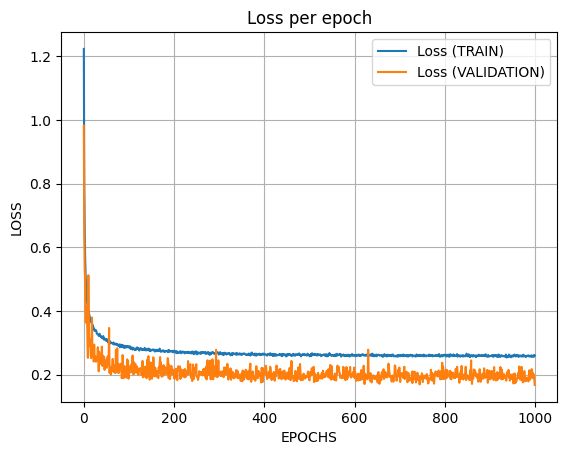

 error  of the model : 737.98%


In [32]:
plt.plot(MnistHistory.history['loss'], label='Loss (TRAIN)')
plt.plot(MnistHistory.history['val_loss'], label='Loss (VALIDATION)')
plt.xlabel('EPOCHS')
plt.ylabel('LOSS')
plt.title('Loss per epoch')
plt.legend()
plt.grid()
plt.show()
print(f" error  of the model : {loss*100:.2f}%")


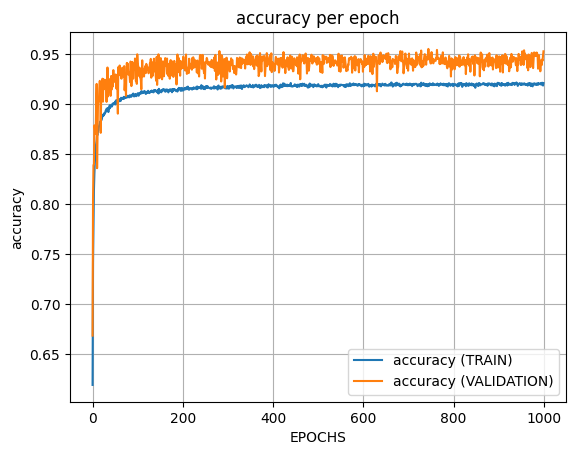

accuracy of the model : 11.35%


In [33]:
plt.plot(MnistHistory.history['accuracy'], label='accuracy (TRAIN)')
plt.plot(MnistHistory.history['val_accuracy'], label='accuracy (VALIDATION)')
plt.xlabel('EPOCHS')
plt.ylabel('accuracy')
plt.title('accuracy per epoch')
plt.legend()
plt.grid()
plt.show()

print(f"accuracy of the model : {acc*100:.2f}%")


## proceed with a class prediciton for our random sample

use a random variable to our data sample 

In [113]:
id = np.random.choice(xTestMnist.shape[0], 1000, replace=False) 


In [114]:
MnistPredictions = MnistModel.predict(xTestMnist[id[0]:id[0]+1]) # make predictions on the test set

1/1 [==============================] - 0s 27ms/step


predicted class: 1
rial class:  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


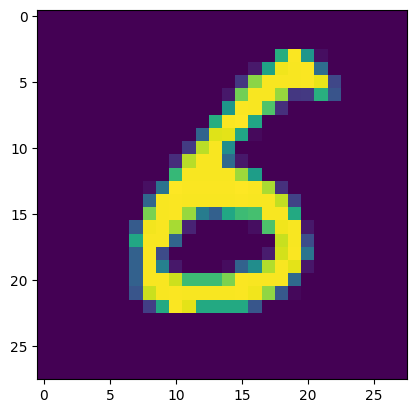

In [115]:
predicted_class = np.argmax(MnistPredictions)
plt.imshow(xTestMnist[id[0]])

print("predicted class:" , predicted_class)
print("rial class: ",yTestMnist[id[0]]) # display the true class of the image